# Credit Card Fraud Detection
Problem Statement:
The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

DataSet :
The dataset that is used for credit card fraud detection is derived from the following Kaggle 

In [1]:
# IMPORT NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import scipy
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize']=14,8
RANDOM_SEED=29
LABELS=["Normal","Fraud"]


In [3]:
 # READ THE DATASET

In [4]:
dataset=pd.read_csv('CreditcardFraudDetection.csv')

In [5]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
# EXPLOTARY DATA ANALYSIS

In [8]:
dataset.isnull().values.any()

False

In [9]:
# CHECK THE TARGET TRANSCTIONS DATA DISTIBUTIN

Text(0, 0.5, 'Frequency')

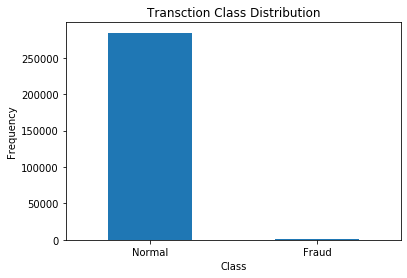

In [10]:
count_classes=pd.value_counts(dataset['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Transction Class Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [11]:
fraud=dataset[dataset['Class']==1]
normal=dataset[dataset['Class']==0]

In [12]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [13]:
# more described for information for fraud and normal data

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
# visualization for transction data

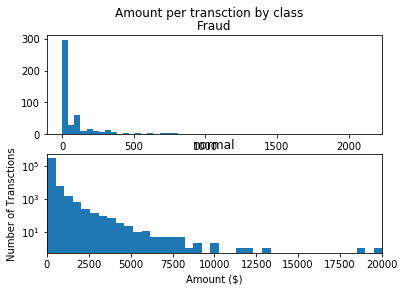

In [17]:
fig,(ax1,ax2)=plt.subplots(2)
fig.suptitle('Amount per transction by class')
bins=50
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount,bins=bins)
ax2.set_title('normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transctions')
plt.xlim(0,20000)
plt.yscale('log')
plt.show();
              

In [18]:
# we will check Do fraudulent transctions occur more often during certain frame time? Let us find out with a visual representaion

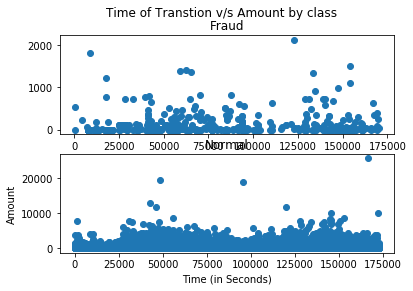

In [19]:
fig,(ax1,ax2)=plt.subplots(2)
fig.suptitle('Time of Transtion v/s Amount by class')
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [20]:
# take the some sample from data

In [36]:
data1=dataset.sample(frac=0.02,random_state=0)
data1.shape

(5696, 31)

In [37]:
dataset.shape

(284807, 31)

In [38]:
# deatermine no of fraud and valid transction from sampme data

In [39]:
fraud=data1[data1['Class']==1]
normal=data1[data1['Class']==0]
outlier_fraction=len(fraud)/float(len(normal))

In [40]:
print(outlier_fraction)
print("Fraud Cases: {}".format(len(fraud)))
print("Normal Cases: {}".format(len(normal)))

0.0014064697609001407
Fraud Cases: 8
Normal Cases: 5688


In [41]:
# correlation with heatmap

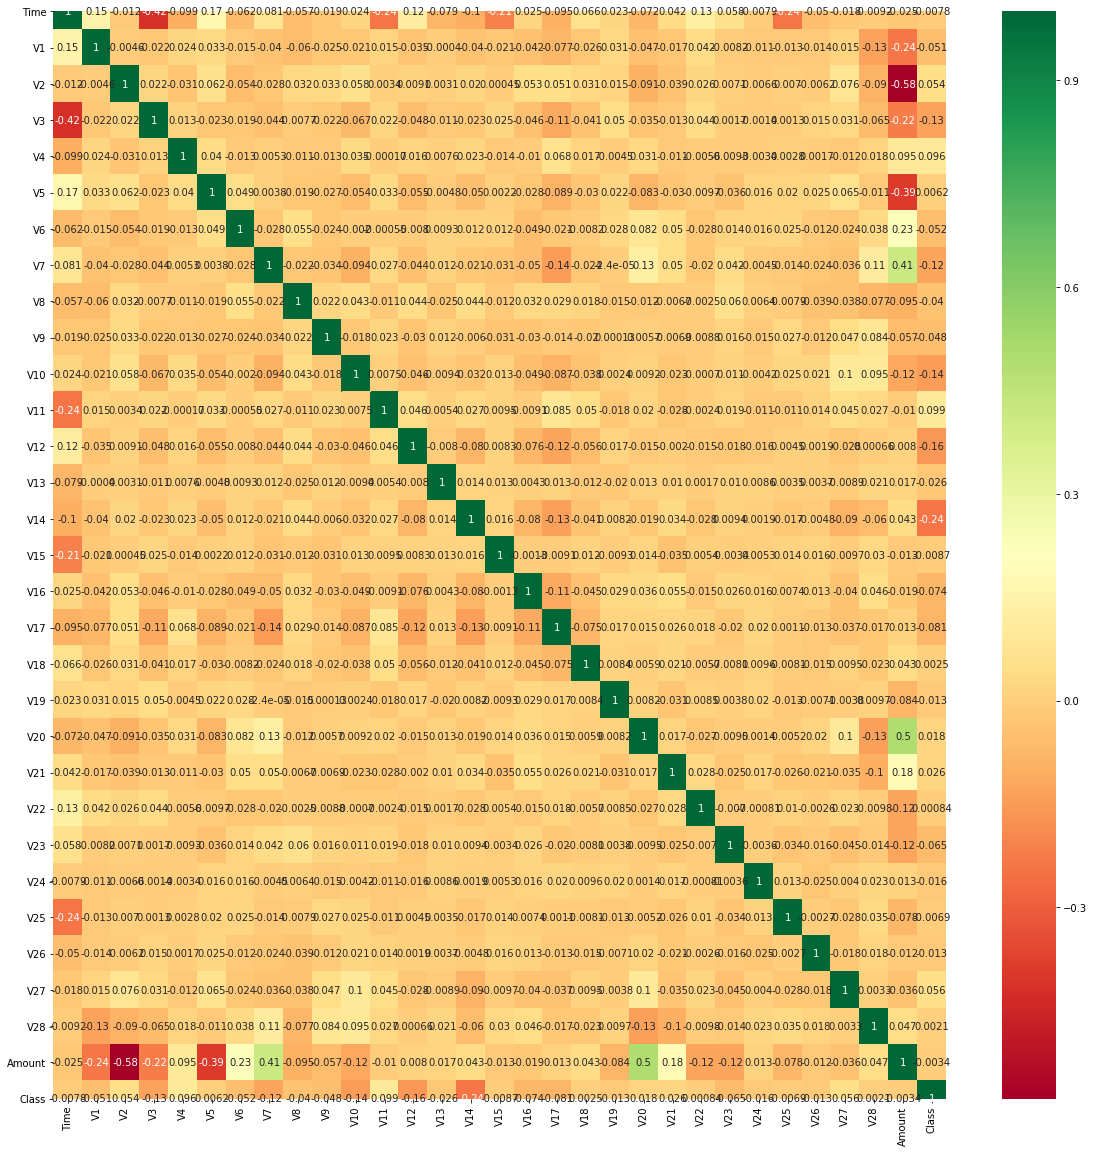

In [42]:
import seaborn as sns
# get correltion of each feature in dataset
corrmat=data1.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
# plot the heatmap
corr_heatmap=sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [43]:
# create the independent and dependent data set
columns=data1.columns.tolist()
# filter the columns to remove data we do not want
columns=[c for c in columns if  c not in ['Class']]
# store the predicting variables
target='Class'
# define the randomstate
state=np.random.RandomState(29)
x=data1[columns]
y=data1[target]
x_outlier=state.uniform(low=0,high=1,size=(x.shape[0],x.shape[1]))
# print yhe xshape and yshape
print(x.shape)
print(y.shape)


(5696, 30)
(5696,)


#MODEL PREDICTION ALGORITHMS

1. Isolation Forest Anomaly Detection Algorithm

2.Density-Based Anomaly Detection (Local Outlier Factor)Algorithm

3.Support Vector Machines

In [44]:
# Define the outlier detection methods

In [45]:
classifiers={
    "Isolation Forest":IsolationForest( n_estimators=100,max_samples=len(x),
                                       contamination=outlier_fraction,random_state=state,verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,algorithm='auto',
                                              leaf_size=30,metric='minkowski',
                                              p=2,metric_params=None,contamination=outlier_fraction),
    "Support Vector Machines":OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05,max_iter=-1,random_state=state)
}



In [46]:
type(classifiers)

dict

In [47]:
# predict the models with fit method

In [49]:
n_outliers=len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    # fit the data and tag outliers
    if clf_name=="Local Outlier Factor":
       y_pred=clf.fit_predict(x)
       scores_prediction=clf.negative_outlier_factor_
    elif clf_name=="Support Vector Nachines":
         clf.fit(x)
         y_pred=clf.predict(x)
    else :
        clf.fit(x)
        score_prediction=clf.decision_function(x)
        y_pred=clf.predict(x)
        
# Reshape the prediction values to 0 for valid tarnsctons and 1 for fraud transctions

y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1
n_errors=(y_pred!=y).sum()

# Print the classifiaction metrics

print("{}: {} ".format(clf_name,n_errors))
print("Accuracy Score:")
print(accuracy_score(y,y_pred))
print("Classification report:")
print(classification_report(y,y_pred))



C:\Users\UER\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\UER\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\UER\Anaconda3\lib\site-packages\sklearn\svm\classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)


Support Vector Machines: 3745 
Accuracy Score:
0.34252106741573035
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.34      0.51      5688
           1       0.00      0.75      0.00         8

    accuracy                           0.34      5696
   macro avg       0.50      0.55      0.26      5696
weighted avg       1.00      0.34      0.51      5696

